# Linear Models and Loss Functions

This project includes methods to fit a linear model using an OLS cost function and a LAD cost function. It fits the linear model using both cost functions to a data set and fits the data using Scikit-Learn.

## Data set 

The data represents the miles-per-gallon of 398 cars given other variables describing them:

1. mpg: continuous. The miles-per-gallon of the car.
2. cylinders: multi-valued discrete. Number of cylinders.
3. displacement: continuous. Engine displacement of the car. 
4. horsepower: continuous. Total horsepower of the car.
5. weight: continuous. Weight in lbs.
6. acceleration: continuous. Acceleration 0-60mph in seconds.
9. car name: string (unique for each instance)

#### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model
import scipy.optimize as so

%matplotlib inline

#### Load data

In [2]:
# Read in the dataset
df = pd.read_csv('car_data.csv')

#### Describe data

In [3]:
# Show its descriptive statistics
df.describe()

,MPG,cylinders,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


#### Plot data

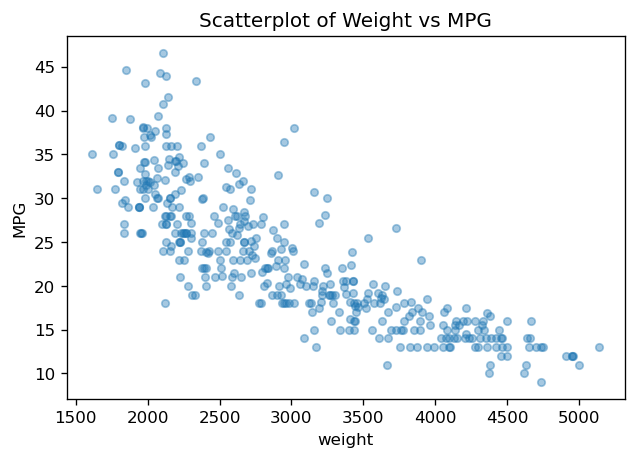

In [4]:
# Create scatter plot of the weight and MPG
fig, ax = plt.subplots(dpi = 120)
df.plot.scatter(x = 'weight', y = 'MPG', alpha = 0.4, ax=ax, title = 'Scatterplot of Weight vs MPG')
plt.show()

There is a negative correlation between weight and MPG of a car. As the weight of a car increases, the MPG decreases. There is more dispersion at low weight cars vs high weight cars. There is also a non-linear trend.

### OLS Regression
####  Function to compute linear model predictions given data and a coefficient vector
The function should take as it's arguments a 1d-array of coefficients b and the design matrix X as a 2d-array and return linear model predictions yp.

In [5]:
# Function to compute linear model predictions
def linearModelPredict(b,X):
    yp = X@b
    return yp

In [6]:
# Test the function
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
print('X@b:', linearModelPredict(b,X))

X@b: [ 0.1 -0.2  0.7]


#### Function to compute and return the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss
The function should take as its first argument a 1d-array beta of coefficients for the linear model, as its second argument the design matrix X as a 2d-array, and as its third argument a 1d-array y of observed outcomes.

In [7]:
# Function to return the loss function for an OLS model and the gradient of the loss
def linearModelLossRSS(beta,X,y):
    # Get model prediction
    predY = linearModelPredict(beta,X)
    # Get the vector of residuals
    res = y - predY
    # Get the residuals sums of squares
    rss = sum(res ** 2)
    # Get the gradient
    gradient = -2 * (res@X)
    # Return rss and gradient
    return (rss,gradient)

In [8]:
# Test the function
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
rss, gradient = linearModelLossRSS(b,X,y)
print('RSS:', rss)
print('Gradient:', gradient)

RSS: 2.06
Gradient: [-3.6 -4. ]


To minimize the loss, you need to increase the value of the parameters since the gradient is negative for both parameters

#### Function to fit a linear model
The function should take as its first argument the design matrix X as a 2d-array, as its second argument a 1d-array y of outcomes, and as its third argument a function lossfcn, which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

In [9]:
# Function to fit a linear model
def linearModelFit(X,y,lossfcn = linearModelLossRSS):
    # Set starting values
    bstart = [0,0]
    # Call the optimization function
    RESULT = so.minimize(lossfcn,bstart,args=(X,y),jac=True)  
    # Print RESULT
    print('RESULT: \n', RESULT)
    # Calculate the fitted R2
    betas = RESULT.x
    res = y - y.mean()
    TSS = sum(res**2)
    RSS,gradient = linearModelLossRSS(betas,X,y)
    R2 = 1 - (RSS / TSS)
    return (betas,R2)

In [10]:
# Test the function
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])
betas, R2 = linearModelFit(X,y,linearModelLossRSS)
print('\nBetas:', betas)
print('R2:', R2)

RESULT: 
       fun: 0.56
 hess_inv: array([[ 0.17857143, -0.03571429],
       [-0.03571429,  0.10714286]])
      jac: array([-4.44089210e-16, -6.66133815e-16])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([0.6, 0.6])

Betas: [0.6 0.6]
R2: 0.75


#### Using the above functions, fit the model to the car data
The MPG is the target (y) variable and the weight is the independent (x). Using the model and the fitted parameters, make predictions along a grid of equally spaced weights within the original range of the weight variable.  

In [11]:
# Set X and y
y = df.MPG.values
X = np.c_[np.ones(np.size(df.weight)),df.weight] 

# Fit OLS model to the car data
b, R2 = linearModelFit(X,y,linearModelLossRSS)
x_grid = np.linspace(df.weight.min(),df.weight.max(),100)
Xn = np.c_[np.ones(x_grid.size),x_grid]
yp = linearModelPredict(b,Xn)

RESULT: 
       fun: 7321.233706188365
 hess_inv: array([[ 9.99999906e-01, -3.10629262e-04],
       [-3.10629262e-04,  9.66236120e-08]])
      jac: array([4.20641300e-11, 1.31316483e-07])
  message: 'Optimization terminated successfully.'
     nfev: 5
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([ 4.62165245e+01, -7.64734254e-03])


#### Plot data

R2 value: 0.6926304331206252


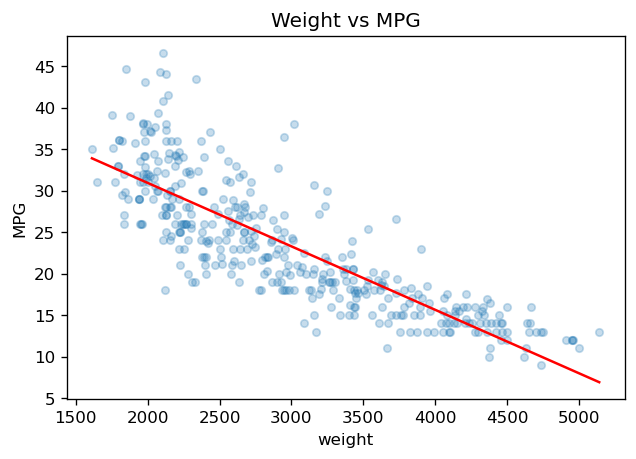

In [12]:
# Plot the data
fig, ax = plt.subplots(dpi = 120)
df.plot.scatter(x = 'weight', y = 'MPG', alpha = 0.25, ax = ax, title = 'Weight vs MPG')
# Add a line for the predicted values
ax.plot(x_grid, yp, color = 'red')

print('R2 value:', R2)

### LAD Regression
#### Function to compute the least absolute deviation loss function for a linear model parameterized by $\beta$, as well as the gradient of the loss  
The function should take as its first argument a 1d-array beta of coefficients for the linear model, as its second argument the design matrix X as a 2d-array, and as its third argument a 1d-array y of observed outcomes.

In [13]:
# Function to compute the LAD loss function for a linear model and the gradient of the loss
def linearModelLossLAD(beta,X,y):
    # Get model prediction
    predY = linearModelPredict(beta,X)
    # Get the vector of residuals
    res = y - predY
    # Get the residuals sums of magnitudes
    sum_abs = sum(np.absolute(res))
    # Get the gradient
    gradient = -((np.sign(res))@X)
    # Return sum_abs and gradient
    return (sum_abs,gradient)

In [14]:
# Test the function
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
loss, gradient = linearModelLossLAD(b,X,y)
print('Loss:', loss)
print('Gradient:', gradient)

Loss: 2.0
Gradient: [-1. -1.]


#### Using the above functions, fit the model to the car data
Using the model, make predictions along a grid of 100 equally spaced car weights.

In [15]:
# Set X and y
y = df.MPG.values
X = np.c_[np.ones(np.size(df.weight)),df.weight] 

# Fit LAD model to the car data
b, R2 = linearModelFit(X,y,linearModelLossLAD)
x_grid = np.linspace(df.weight.min(),df.weight.max(),100)
Xn = np.c_[np.ones(x_grid.size),x_grid]
yp = linearModelPredict(b,Xn)

RESULT: 
       fun: 1273.1497171603028
 hess_inv: array([[ 3.20626945e+00, -7.65201976e-04],
       [-7.65201976e-04,  1.82747429e-07]])
      jac: array([2.000e+00, 6.883e+03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 63
      nit: 7
     njev: 58
   status: 2
  success: False
        x: array([ 4.42032543e+01, -7.12723977e-03])


Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum. This will lead to some gradient based optimizers to fail to converge. If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.

#### Plot data

R2 value: 0.6858739742520508


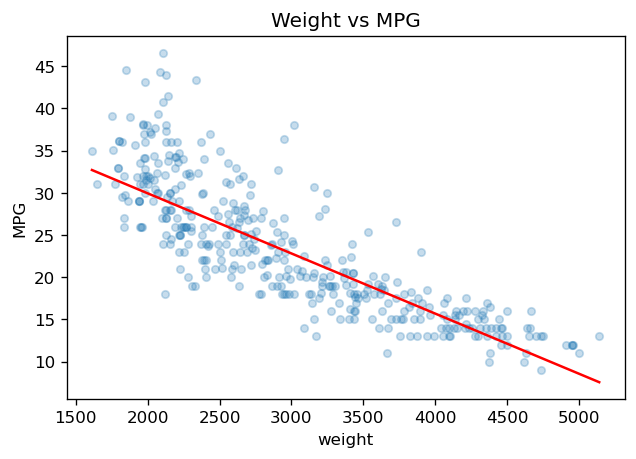

In [16]:
# Plot the data
fig, ax = plt.subplots(dpi = 120)
df.plot.scatter(x = 'weight', y = 'MPG', alpha = 0.25, ax = ax, title = 'Weight vs MPG')
# Add a line for the predicted values
ax.plot(x_grid,yp,color='red')

print('R2 value:', R2)    

The fit obtained with the L2 cost function is slightly better than the fit obtained with the L1 cost function. The R2 value from the L1 function is slightly lower than the R2 value from the L2 function. Since median regression is a robust regression technique, it is much less influenced by outliers than OLS regression. Thus, the residuals are bigger for LAD regression, leading to a lower R2 value. Also, since OLS is miming the RSS, it will always have the highest R2 value possible for that class of models.

### Fit Data using sklearn
Fit an OLS model to the car data (excluding the name) with the linear_model module from the sklearn package by using the LinearRegression class.

In [17]:
# Set X and y
y = df.MPG.values
X = df.iloc[:, 1:6]

# Fit an OLS model to the car data
ols = linear_model.LinearRegression().fit(X,y)
print('R2 value:', ols.score(X,y))

R2 value: 0.7076926326770515


The R2 value from sklearn is 0.71, which is very close to the R2 value of 0.69 that we got by using only weight as a predictor. Therefore, we can identify that weight is the most important factor of the ones given here for identifying MPG consumption.